NEUTRINO SOURCE CANDIDATES WITHIN 9.5 DEGREES OF: RA 270.0 DEC 0.0

Name & Catalog           RA      DEC  Type of Source
------------------  -------  -------  ------------------------
3FGL J1728.5+0428   262.145   4.4779  blazar
3FGL J1730.5+0023   262.647   0.3971  blazar
3FGL J1730.6-0357   262.665  -3.9524  unknown gamma ray source
3FGL J1736.4+0634   264.124   6.5678  blazar
3FGL J1744.3-0353   266.076  -3.8981  blazar
3FGL J1745.4-0754   266.352  -7.9004  blazar
3FGL J1746.6+0433   266.652   4.5595  unknown gamma ray source
3FGL J1747.1+0139   266.785   1.6547  AGN / active galaxy
3FGL J1747.3+0324   266.846   3.4129  unknown gamma ray source
3FGL J1749.7-0305   267.448  -3.0865  unknown gamma ray source
3FGL J1804.1+0341   271.034   3.6974  blazar
3FGL J1804.5-0850   271.13   -8.8421  unknown gamma ray source
3FGL J1805.9+0614   271.478   6.2376  pulsar
3FGL J1811.2+0340   272.818   3.6792  blazar
3FGL J1813.6+0614   273.41    6.2445  blazar
3FGL J1824.3-0620   276.099  -6.3395  

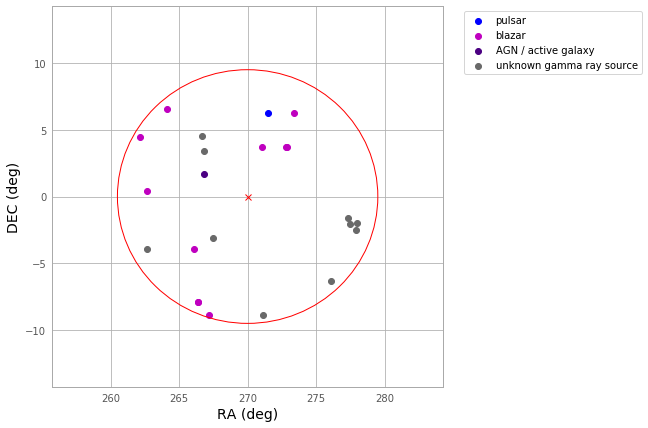

<module 'matplotlib.pyplot' from '/Users/william/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [1]:
from astropy.io import fits
import argparse, sys, os, urllib.request
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from tabulate import tabulate

# The following parameters are set this way so that the legend 
# is not cut off when the program is run from a terminal:

#from matplotlib import rcParams     
#rcParams.update({'figure.subplot.right': 0.73})
#rcParams.update({'figure.subplot.left': 0.15})
#rcParams.update({'figure.subplot.top': 0.89})
#rcParams.update({'figure.subplot.bottom': 0.22})

# For running in ipython notebook (comment out otherwise):
%matplotlib inline

######################################

# This part not needed if running from ipython notebook
# When using ipython notebook, set RA, DEC, ERR manually

# We want the user to input the neutrino event's RA, DEC, and the radius of its error circle:

#parser = argparse.ArgumentParser()
#parser.add_argument('-r', '--RA', type = float, dest = 'RA', help = 'enter right ascension in degrees')
#parser.add_argument('-d', '--DEC', type = float, dest = 'DEC', help = 'enter declination in degrees')
#parser.add_argument('-e', '--ERR', type = float, dest = 'ERR', help = 'enter radius of the error circle in degrees')

#args = parser.parse_args()

# Limit acceptable values of RA and DEC. 
# It's possible to do this in argparse but I haven't found a good way yet.

#if not(0.0 <= args.RA <= 360.0):
#    print('Error: Right Ascension should be between 0 and 360 degrees')
#    sys.exit()
    
#if not(-90.0 <= args.DEC <= 90.0):
#    print('Error: Declination should be between -90 and 90 degrees')
#    sys.exit()

# Variables are easier to work with without the 'args.'

#RA = args.RA
#DEC = args.DEC
#ERR = args.ERR

######################################

# This function plots the error circle of the neutrino event

def ploterrcirc(RA, DEC, ERR):
    # Set the size of the grid to be 1.5x the size of the error circle
    
    RA1 = RA - 1.5 * ERR
    RA2 = RA + 1.5 * ERR
    DEC1 = DEC - 1.5 * ERR
    DEC2 = DEC + 1.5 * ERR
    
    # Now plot the error circle
    
    fig = plt.figure(1, figsize=(7, 7))
    plt.axis([RA1, RA2, DEC1, DEC2])
    ax = fig.add_subplot(1, 1, 1)
    errcirc = plt.Circle((RA, DEC), radius = ERR, color = 'r', fill = False)
    ax.add_patch(errcirc)
    
    # Label axes
    
    plt.xlabel('RA (deg)', fontsize = 14)
    plt.ylabel('DEC (deg)', fontsize = 14)
        
    # We can also plot an 'x' at the center of the circle to mark the RA and DEC of the detection
    
    plt.plot(RA, DEC, 'x', color = 'r')
    
######################################

# This function reads downloads and data from fits files and sorts the sources by type
# It is called once per catalog, and requires some fine tuning based on 
# which catalog is being read

def readfits(URL, file_name, RA, DEC, ERR, marker):
    # Check if the catalog exists already. If not, download it from the website and save it:
    if(os.path.isfile(file_name) == False):
        urllib.request.urlretrieve(URL, file_name)
    
    # Read data from file:
    hdulist = fits.open(file_name)
    tbdata = hdulist[1].data
    names = tbdata.field(0)
    RAs = tbdata.field(1)
    DECs = tbdata.field(2)
    if(marker == '3FGL'):
        classes = tbdata.field(73)
    if(marker == '2FHL'):
        classes = tbdata.field(34)
    
    # We want to only plot sources that are within the error circle:
    for i in range(len(names)):
        if(((RAs[i] - RA) ** 2 + (DECs[i] - DEC) ** 2) > (ERR ** 2)):
            names[i] = 'bad'
            RAs[i] = 1000.0
            DECs[i] = 1000.0
            classes[i] = 'bad'
    
    names = list(filter(lambda a: a != 'bad', names))
    RAs = list(filter(lambda a: a < 900.0, RAs))
    DECs = list(filter(lambda a: a < 900.0, DECs))
    classes = list(filter(lambda a: a != 'bad', classes))
    
    srctype = np.zeros(len(names), dtype = '52str')
    
    if not 'psrRA' in globals():
        global psrRA
        global psrDEC
        psrRA = []
        psrDEC = []
    if not 'pwnRA' in globals():
        global pwnRA
        global pwnDEC
        pwnRA = []
        pwnDEC = []
    if not 'snrRA' in globals():
        global snrRA
        global snrDEC
        snrRA = []
        snrDEC = []
    if not 'sppRA' in globals():
        global sppRA
        global sppDEC
        sppRA = []
        sppDEC = []          
    if not 'hmbRA' in globals():
        global hmbRA
        global hmbDEC
        hmbRA = []
        hmbDEC = []     
    if not 'bzrRA' in globals():
        global bzrRA
        global bzrDEC
        bzrRA = []
        bzrDEC = []
    if not 'rdgRA' in globals():
        global rdgRA
        global rdgDEC
        rdgRA = []
        rdgDEC = []  
    if not 'gclRA' in globals():
        global gclRA
        global gclDEC
        gclRA = []
        gclDEC = []
    if not 'agnRA' in globals():
        global agnRA
        global agnDEC
        agnRA = []
        agnDEC = []
    if not 'binRA' in globals():
        global binRA
        global binDEC
        binRA = []
        binDEC = []
    if not 'sfrRA' in globals():
        global sfrRA
        global sfrDEC
        sfrRA = []
        sfrDEC = []
    if not 'galRA' in globals():
        global galRA
        global galDEC
        galRA = []
        galDEC = []
    if not 'rgbRA' in globals():
        global rgbRA
        global rgbDEC
        rgbRA = []
        rgbDEC = []
    if not 'seyRA' in globals():
        global seyRA
        global seyDEC
        seyRA = []
        seyDEC = []
    if not 'novRA' in globals():
        global novRA
        global novDEC
        novRA = []
        novDEC = []
    if not 'glcRA' in globals():
        global glcRA
        global glcDEC
        glcRA = []
        glcDEC = []
    if not 'qsrRA' in globals():
        global qsrRA
        global qsrDEC
        qsrRA = []
        qsrDEC = []
    if not 'sbgRA' in globals():
        global sbgRA
        global sbgDEC
        sbgRA = []
        sbgDEC = []
    if not 'unkRA' in globals():
        global unkRA
        global unkDEC
        unkRA = []
        unkDEC = []

    for i in range(len(names)):
        if((classes[i] == 'psr') or (classes[i] == 'PSR')):
            srctype[i] = 'pulsar'
            psrRA.append(RAs[i])
            psrDEC.append(DECs[i])
        elif(classes[i] == 'pwn'):
            srctype[i] = 'psr wind nebula'
            pwnRA.append(RAs[i])
            pwnDEC.append(DECs[i])
        elif(classes[i] == 'snr'):
            srctype[i] = 'SNR'
            snrRA.append(RAs[i])
            snrDEC.append(DECs[i])
        elif(classes[i] == 'spp'):
            srctype[i] = 'SNR/PWN'
            sppRA.append(RAs[i])
            sppDEC.append(DECs[i])
        elif(classes[i] == 'hmb'):
            srctype[i] = 'high-mass binary'
            hmbRA.append(RAs[i])
            hmbDEC.append(DECs[i])
        elif(classes[i] == 'bin'):
            srctype[i] = 'binary'
            binRA.append(RAs[i])
            binDEC.append(DECs[i])
        elif(classes[i] == 'sfr'):
            srctype[i] = 'star-forming region'
            sfrRA.append(RAs[i])
            sfrDEC.append(DECs[i])
        elif((classes[i] == 'bll') or (classes[i] == 'bll-g') or (classes[i] == 'fsrq') or (classes[i] == 'bcu I') or (classes[i] == 'bcu II') or (classes[i] == 'bcu III')):
            srctype[i] = 'blazar'
            bzrRA.append(RAs[i])
            bzrDEC.append(DECs[i])
        elif((classes[i] == 'agn') or (classes[i] == 'bcu')):
            srctype[i] = 'AGN / active galaxy'
            agnRA.append(RAs[i])
            agnDEC.append(DECs[i])
        elif(classes[i] == 'rdg'):
            srctype[i] = 'radio galaxy'
            rdgRA.append(RAs[i])
            rdgDEC.append(DECs[i])
        elif(classes[i] == 'rdg/bll'):
            srctype[i] = 'radio galaxy / BL Lac blazar'
            rgbRA.append(RAs[i])
            rgbDEC.append(DECs[i])
        elif(classes[i] == 'gal'):
            srctype[i] = 'normal galaxy (or part)'
            galRA.append(RAs[i])
            galDEC.append(DECs[i])
        elif(classes[i] == 'galclu'):
            srctype[i] = 'galaxy cluster'
            gclRA.append(RAs[i])
            gclDEC.append(DECs[i])
        elif((classes[i] == 'nlsy1') or (classes[i] == 'sey')):
            srctype[i] = 'Seyfert galaxy'
            seyRA.append(RAs[i])
            seyDEC.append(DECs[i])
        elif(classes[i] == 'nov'):
            srctype[i] = 'nova'
            novRA.append(RAs[i])
            novDEC.append(DECs[i])
        elif(classes[i] == 'glc'):
            srctype[i] = 'globular cluster'
            glcRA.append(RAs[i])
            glcDEC.append(DECs[i])
        elif((classes[i] == 'css') or (classes[i] == 'ssrq')):
            srctype[i] = 'quasar'
            qsrRA.append(RAs[i])
            qsrDEC.append(DECs[i])
        elif(classes[i] == 'sbg'):
            srctype[i] = 'starburst galaxy'
            sbgRA.append(RAs[i])
            sbgDEC.append(DECs[i])
        else:
            srctype[i] = 'unknown gamma ray source'
            unkRA.append(RAs[i])
            unkDEC.append(DECs[i])
    
    # Here, we will make sure that these arrays won't be overwritten next time the function is called with a different catalog
    # Also, by setting the new arrays as global variables, we can then use them later in the program
    
    if (marker == '3FGL'):
        global names3FGL
        global RAs3FGL
        global DECs3FGL
        global classes3FGL
        global srctype3FGL
        names3FGL = names
        RAs3FGL = RAs
        DECs3FGL = DECs
        classes3FGL = classes
        srctype3FGL = srctype
    if (marker == '2FHL'):
        global names2FHL
        global RAs2FHL
        global DECs2FHL
        global classes2FHL
        global srctype2FHL
        names2FHL = names
        RAs2FHL = RAs
        DECs2FHL = DECs
        classes2FHL = classes
        srctype2FHL = srctype
    if (marker == 'TEV'):
        global namesTEV
        global RAsTEV
        global DECsTEV
        global classesTEV
        global srctypeTEV
        namesTEV = names
        RAsTEV = RAs
        DECsTEV = DECs
        classesTEV = classes
        srctypeTEV = srctype
        
######################################

# This function plots the source candidates and color codes them based on type

def plotsrcs(psrRA, psrDEC, pwnRA, pwnDEC, snrRA, snrDEC, sppRA, sppDEC, hmbRA, hmbDEC, binRA, binDEC, sfrRA, sfrDEC, bzrRA, bzrDEC, agnRA, agnDEC, rdgRA, rdgDEC, rgbRA, rgbDEC, galRA, galDEC, gclRA, gclDEC, seyRA, seyDEC, novRA, novDEC, glcRA, glcDEC, qsrRA, qsrDEC, sbgRA, sbgDEC, unkRA, unkDEC):
    
    if(psrRA != []):
        plt.scatter(psrRA, psrDEC, c = 'b', label = 'pulsar')
    if(pwnRA != []):
        plt.scatter(pwnRA, pwnDEC, c = 'lavender', label = 'psr wind nebula')
    if(snrRA != []):
        plt.scatter(snrRA, snrDEC, c = 'darkred', label = 'supernova remnant')
    if(sppRA != []):
        plt.scatter(sppRA, sppDEC, c = 'g', label = 'SNR or PWN')
    if(hmbRA != []):
        plt.scatter(hmbRA, hmbDEC, c = 'r', label = 'high-mass binary')
    if(binRA != []):
        plt.scatter(binRA, binDEC, c = 'pink', label = 'binary')
    if(sfrRA != []):
        plt.scatter(sfrRA, sfrDEC, c = 'c', label = 'star-forming region')
    if(bzrRA != []):
        plt.scatter(bzrRA, bzrDEC, c = 'm', label = 'blazar')
    if(agnRA != []):
        plt.scatter(agnRA, agnDEC, c = 'indigo', label = 'AGN / active galaxy')
    if(rdgRA != []):
        plt.scatter(rdgRA, rdgDEC, c = 'lime', label = 'radio galaxy')
    if(rgbRA != []):
        plt.scatter(rgbRA, rgbDEC, c = 'aqua', label = 'radio galaxy / BL Lac blazar')
    if(galRA != []):    
        plt.scatter(galRA, galDEC, c = 'y', label = 'galaxy')
    if(gclRA != []):
        plt.scatter(gclRA, gclDEC, c = 'k', label = 'galaxy cluster')
    if(seyRA != []):
        plt.scatter(seyRA, seyDEC, c = 'tan', label = 'Seyfert galaxy')
    if(novRA != []):
        plt.scatter(novRA, novDEC, c = 'w', label = 'nova')
    if(glcRA != []):
        plt.scatter(glcRA, glcDEC, c = 'black', label = 'globular cluster')
    if(qsrRA != []):
        plt.scatter(qsrRA, qsrDEC, c = 'darkviolet', label = 'quasar')
    if(sbgRA != []):
        plt.scatter(sbgRA, sbgDEC, c = 'maroon', label = 'starburst galaxy')
    if(unkRA != []):    
        plt.scatter(unkRA, unkDEC, c = 'dimgray', label = 'unknown gamma ray source')

######################################

# This function outputs a table onto the command line listing the sources
# inside the error circle, along with their coordinates, name, type, and flux.

#def printout(RA, DEC, ERR, names3FGL, names2FHL, namesTEV, RAs3FGL, RAs2FHL, RAsTEV, DECs3FGL, DECs2FHL, DECsTEV, srctype3FGL, srctype2FHL, srctypeTEV):
def printout(RA, DEC, ERR, names3FGL, names2FHL, RAs3FGL, RAs2FHL, DECs3FGL, DECs2FHL, srctype3FGL, srctype2FHL):    
    names = np.append(names3FGL, names2FHL)
    RAs = np.append(RAs3FGL, RAs2FHL)
    DECs = np.append(DECs3FGL, DECs2FHL)
    srctype = np.append(srctype3FGL, srctype2FHL)
    
    table = np.zeros(len(names), '20str, f, f, 30str')
    headers = ('Name & Catalog', 'RA', 'DEC', 'Type of Source')
    for i in range(len(names)):
        table[i] = (names[i], RAs[i], DECs[i], srctype[i])
    
    print('NEUTRINO SOURCE CANDIDATES WITHIN', ERR, 'DEGREES OF: RA', RA, 'DEC', DEC)
    print('')
    print(tabulate(table, headers))
    
######################################
######################################

# This part is for manual input. Should be commented out if 
# it is intended to use command-line input from a terminal.

RA = 270.0
DEC = 0.0
ERR = 9.5

######################################

ploterrcirc(RA, DEC, ERR)
readfits('https://fermi.gsfc.nasa.gov/ssc/data/access/lat/4yr_catalog/gll_psc_v16.fit', './3FGLCat.fit', RA, DEC, ERR, '3FGL')
readfits('https://fermi.gsfc.nasa.gov/ssc/data/access/lat/2FHL/gll_psch_v09.fit', './2FHLCat.fit', RA, DEC, ERR, '2FHL')
#readfits('', './TEVCat.fit', RA, DEC, ERR, 'TEV')
printout(RA, DEC, ERR, names3FGL, names2FHL, RAs3FGL, RAs2FHL, DECs3FGL, DECs2FHL, srctype3FGL, srctype2FHL)

plotsrcs(psrRA, psrDEC, pwnRA, pwnDEC, snrRA, snrDEC, sppRA, sppDEC, hmbRA, hmbDEC, binRA, binDEC, sfrRA, sfrDEC, bzrRA, bzrDEC, agnRA, agnDEC, rdgRA, rdgDEC, rgbRA, rgbDEC, galRA, galDEC, gclRA, gclDEC, seyRA, seyDEC, novRA, novDEC, glcRA, glcDEC, qsrRA, qsrDEC, sbgRA, sbgDEC, unkRA, unkDEC)

plt.legend(bbox_to_anchor = (1.04, 1), loc = "upper left")

plt.show()



plt